## To do

Want to be able to point this at a named directory which has the data files for a paramter sweep, as well as paramter dictionries, it should return the data in xarray format, as well as set of unique paramter values that define each model.

Also create a dimensionlized version of the data array. 

In [116]:
import numpy as np
import glob2
import pandas as pd
import xarray as xr

from types import ModuleType
from natsort import natsort as ns
if isinstance(ns, ModuleType):
    natsort = ns.natsorted
else:
    nasort = ns
    
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [171]:
#rdir = '/workspace'
rdir = '../'
dat_files = natsort(glob2.glob(rdir + '/results/C/**/*.dat'))

len(dat_files)

54

In [119]:
columns = ['areaintRock', 'tempintRock', 'rmsintRock', 'dwintRock', 'vdintRock', 
            'areaintLith', 'tempintLith','rmsintLith', 'dwintLith', 'vdintLith',
            'areaintLower', 'tempintLower', 'rmsintLower', 'dwintLower', 'vdintLower', 
            'areaintHinge180', 'vdintHinge180', 'areaintHinge60', 'vdintHinge60', 
            'areaintInterface', 'vdintInterface', 'vdintInterface0',
            'rmsSurf', 'nuTop', 'nuBottom', 'plateness', 'subzone',
            'lRidge', 'rRidge', 'realtime']

## Read files to pandas

In [120]:
data = []
gooddata = []


for i in range(len(dat_files)):
    
    try:
        df = pd.read_csv(dat_files[i], sep="\s*", header=None,  index_col=False)
        df.columns = columns
        gooddata.append(str(i))
        data.append(df)
        #print(i)
    except:
        pass


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


In [122]:
dictionary = dict(zip(gooddata, data))
panel = pd.Panel(dictionary)

## Transform to Xarray

In [123]:
xa = xr.DataArray(panel,dims=('model', 'step', 'metric'), coords={'model': gooddata, 'metric':columns})

## Scale dimensional params

In [173]:
list(xa.coords['metric'].data)
matching = [s for s in list(xa.coords['metric'].data) if "rms" in s]
matching

['rmsintRock', 'rmsintLith', 'rmsintLower', 'rmsSurf']

In [184]:
xa.loc[:, :, matching] *= ((1e2*3600*24*365)/(2900.*1e3/1e-6) )

In [191]:
xa.loc[:, :, 'realtime'] *= (((2900.*1e3)**2/1e-6))/(1e6*3600*24*365)

## Parse parameter Dictionaries for set of unique parameters

In [138]:
dict_files = natsort(glob2.glob(rdir + '/results/C/**/200/dp.pkl'))
import pickle
dicts= []
for df in dict_files:
    with open(df,'rb') as f:
        dicts.append(pickle.load(f))
        
dict_sets = [set(d.iteritems()) for d in dicts]
diff_keys = [i[0] for i in set.difference(dict_sets[0], set.intersection(*map(set,dict_sets)))]

clean_dicts = []
for adict in dicts:
    red_dict= dict((k,adict[k]) for k in diff_keys if k in adict)
    clean_dicts.append(red_dict)
    
    
params = pd.DataFrame(clean_dicts)
#newdf = newdf.join(params)

In [139]:
params.columns

Index([u'CVR', u'Edf', u'eta0', u'eta_max', u'fcm'], dtype='object')

In [140]:
#remove any columns that were not intended

del params['CVR']

In [141]:
params.head(3)

,Edf,eta0,eta_max,fcm
0,63000.0,6.250000e+19,1.000000e+23,0.03
1,63000.0,6.250000e+19,1.000000e+24,0.03
2,63000.0,6.250000e+19,1.000000e+25,0.03


In [203]:
groups

for c in params.columns:
    print(c)

Edf
eta0
eta_max
fcm


In [278]:
#we can also extract the groups fairly efficiently

edfs = params.groupby('Edf')
eta0s = params.groupby('eta0')
etamax = params.groupby('eta_max')
fcm = params.groupby('fcm')
len(eta0s.groups) , len(edfs.groups) , len(etamax.groups), len(fcm.groups)

(2, 3, 3, 3)

In [286]:
lols = []
for k in edfs.groups.keys():
    lols.append([i for i in edfs.groups[k]])

## Plotting

In [235]:
#set up colours
import six
from matplotlib import colors, lines
colors_ = list(six.iteritems(colors.cnames))
lines_ = lines.lineStyles.keys()
lines_.reverse()

#lines_, colors_

In [152]:
data = xa[mask,:,:].loc[:, :, 'nuTop']

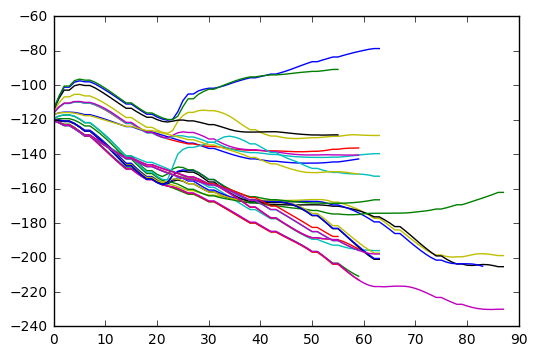

In [153]:
for i in range(data.shape[0]):
    plt.plot(data[i,:])

In [154]:
xa = xa.fillna(0.)

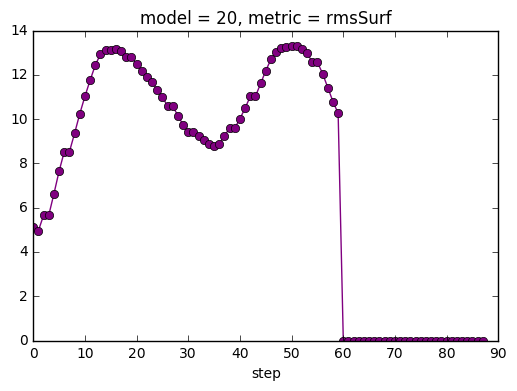

In [212]:
xa.loc[['20'], :, 'rmsSurf'][0,:].plot.line( color='purple', marker='o')

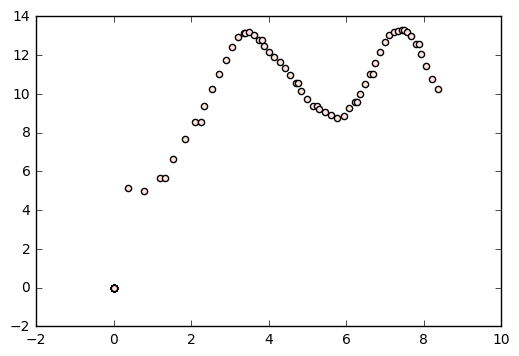

In [234]:
plt.scatter(xa.loc[['20'], :, 'realtime'], xa.loc[['20'], :, 'rmsSurf'], c='mistyrose')

In [211]:
xa.loc[['20'], :, 'rmsSurf'][0,:]

<xarray.DataArray (step: 88)>
array([  5.13943268,   4.96737223,   5.66575506,   5.66575506,
         6.63472373,   7.65474434,   8.53249998,   8.53249998,
         9.3650831 ,  10.24347871,  11.03353376,  11.75713754,
        12.43508026,  12.93260225,  13.13726204,  13.13726204,
        13.17254692,  13.05481872,  12.80793944,  12.80793944,
        12.47313591,  12.18250369,  11.89060288,  11.65637062,
        11.31605846,  10.99829109,  10.57748564,  10.57748564,
        10.14843745,   9.73551694,   9.4026092 ,   9.4026092 ,
         9.22378123,   9.06902124,   8.89099207,   8.76699614,
         8.87264998,   9.25125377,   9.58939724,   9.58939724,
        10.01630715,  10.49853013,  11.02508411,  11.02508411,
        11.60920945,  12.18695989,  12.7049911 ,  13.01962206,
        13.18739252,  13.27159956,  13.28766156,  13.28766156,
        13.18472465,  12.98017709,  12.56736313,  12.56736313,
        12.04618921,  11.42056329,  10.78965772,  10.25896061,
         0.        ,   0.